<a href="https://www.kaggle.com/code/iwways/combat-mode-gaming-aggression-analysis?scriptVersionId=214580544" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
pd.options.display.max_columns = None


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/effects-of-video-games-on-aggression-msdos-csv/Effects of Violent Video Games On Aggression CSV MSDOS.csv


In [2]:
data = pd.read_csv('/kaggle/input/effects-of-video-games-on-aggression-msdos-csv/Effects of Violent Video Games On Aggression CSV MSDOS.csv')

In [3]:
data.head()

,Timestamp,What is your age?,Gender,Class,City/ Residencial status,Type of Family,What type of video games do you typically play?,Name the video game you usually play,How many hours do you play Video Games in a day?,"How much time do you play ""violent"" video games specifically?",What changes on behaviour have you experienced in yourself after playing violent video games?,Some of my Friends think I am hothead,"If I have to resort to violence to protect my rights, I will","When people are especially nice to me, I wonder what they want",I tell my friends openly when I disagree with them,"Once I became so mad, I broke things",When people disagree with me I get into arguments,When I argue I use abusive language,I am a hot-tempered person,I am suspicious of strangers who are too friendly,I have threatened some people whom I know,I can get angry suddenly but get over it quickly,"If I am provoked enough, I will hit another person","When people annoy me, I openly tell them what I think of them",I may hit a person for no good reason,Sometimes I feel I am being treated unfairly,I have trouble controlling my temper,"When frustrated, I show my irritation",Sometimes I feel people are laughing behind my back,I often disagree with people,"If somebody hits me, I hit back",I sometimes feel like exploding for no good reason,I feel other people always take over the oppurtunity and I miss it,there are people who pushed me so far that we begin fighting,"I know that some so called ""friends"" talk about me behind my back",My friends say that I am a bit argumentative,Sometimes I lose temper for no good reason,I get into fights a little more than a normal person,sometimes I can not control the feeling to hit another person,I sometimes get too much jealous from people,I dont know why sometimes I feel bitter about things,"Have you ever been involved in delinquent behaviour? like stealing, breaking things of others",Do you believe that playing violent video games can lead to aggressive behavior in real life?
0,7-11-2023 22:16:49,20,male,12th,Lahore,joint,action,Pubg,more than 3 hour,more than 2 hour,Frustation,agree,Disagree,Neither agree nor disagree,Strongly disagree,Strongly disagree,Strongly agree,Disagree,Disagree,Disagree,Strongly disagree,Agree,Strongly disagree,Strongly agree,Strongly disagree,Disagree,Strongly disagree,Agree,Disagree,Disagree,Disagree,Neither agree nor disagree,Disagree,Agree,Agree,Agree,Strongly disagree,Disagree,NaN,NaN,NaN,no,yes
1,7-11-2023 23:01:27,18,male,11th,Lahore,joint,action,Pubg,more than 3 hour,more than 2 hour,Agerresion . voilent stunt,strongly disagree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,yes,yes
2,7-11-2023 23:11:33,16,male,11th,Lahore,nuclear,action,PUBG,more than 1 hour,more than 1 hour,aggressive,disagree,Strongly disagree,Neither agree nor disagree,Agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Agree,Disagree,Agree,Disagree,Disagree,Neither agree nor disagree,Disagree,Disagree,Disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Strongly disagree,Strongly disagree,Disagree,yes,yes
3,7-11-2023 23:12:33,19,female,12th,Lahore,nuclear,word connect,word connect,less than 1 hour,less than 1 hour,feel fresh,strongly disagree,Agree,Strongly agree,Agree,Strongly agree,Disagree,Strongly disagree,Disagree,Disagree,Disagree,Strongly agree,Disagree,Disagree,Disagree,Agree,Strongly agree,Disagree,Disagree,Agree,Strongly disagree,Agree,Disagree,Strongly disagree,Agree,Disagree,Disagree,Disagree,Disagree,Strongly disagree,Disagree,no,yes
4,7-11-2023 23:14:42,19,male,12th,Balochistan,joint,action,Pubg,more than 2 hour,more than 2 hour,Aggression,agree,St

In [4]:
data.columns

Index(['Timestamp', 'What is your age?', 'Gender', 'Class',
       'City/ Residencial status', 'Type of Family',
       'What type of video games do you typically play?',
       'Name the video game you usually play ',
       'How many hours do you play Video Games in  a day?',
       'How much time do you play "violent" video games specifically?',
       'What changes on behaviour have you experienced in yourself after playing violent video games?',
       'Some of my Friends think I am hothead',
       'If I have to resort to violence to protect my rights, I will',
       'When people are especially nice to me, I wonder what they want',
       'I tell my friends openly when I disagree with them',
       'Once I became so mad, I broke things',
       'When people disagree with me I get into arguments',
       'When I argue I use abusive language', 'I am a hot-tempered person',
       'I am suspicious of strangers who are too friendly',
       'I have threatened some people whom I know

In [5]:
short_names = {
    'Timestamp': 'timestamp',
    'What is your age?': 'age',
    'Gender': 'gender',
    'Class': 'class',
    'City/ Residencial status': 'city_status',
    'Type of Family': 'family_type',
    'What type of video games do you typically play?': 'game_type',
    'Name the video game you usually play ': 'fav_game',
    'How many hours do you play Video Games in  a day?': 'hours_played',
    'How much time do you play "violent" video games specifically?': 'violent_hours',
    'What changes on behaviour have you experienced in yourself after playing violent video games?': 'behavior_changes',
    'Some of my Friends think I am hothead': 'hothead_friends_opinion',
    'If I have to resort to violence to protect my rights, I will': 'violence_protect_rights',
    'When people are especially nice to me, I wonder what they want': 'suspect_niceness',
    'I tell my friends openly when I disagree with them': 'open_disagreement',
    'Once I became so mad, I broke things': 'anger_broke_things',
    'When people disagree with me I get into arguments': 'arguments_disagreement',
    'When I argue I use abusive language': 'abusive_language_argue',
    'I am a hot-tempered person': 'hot_tempered',
    'I am suspicious of strangers who are too friendly': 'suspicious_friendly',
    'I have threatened some people whom I know': 'threatened_people',
    'I can get angry suddenly but get over it quickly': 'sudden_anger_quickly',
    'If I am provoked enough, I will hit another person': 'hit_when_provoked',
    'When people annoy me, I openly tell them what I think of them': 'open_annoyed_response',
    'I may hit a person for no good reason': 'hit_no_reason',
    'Sometimes I feel I am being treated unfairly': 'feel_unfairly_treated',
    'I have trouble controlling my temper': 'temper_control_issue',
    'When frustrated, I show my irritation': 'show_irritation',
    'Sometimes I feel people are laughing behind my back': 'feel_laughed_at',
    'I often disagree with people': 'often_disagree',
    'If somebody hits me, I hit back': 'hit_back',
    'I sometimes feel like exploding for no good reason': 'exploding_feelings',
    'I feel other people always take over the oppurtunity and I miss it': 'miss_opportunity',
    'there are people who pushed me so far that we begin fighting': 'pushed_to_fight',
    'I know that some so called "friends" talk about me behind my back': 'friends_talk_behind',
    'My friends say that I am a bit argumentative': 'friends_argumentative',
    'Sometimes I lose temper for no good reason': 'temper_loss',
    'I get into fights a little more than a normal person': 'frequent_fights',
    'sometimes I can not control the feeling to hit another person ': 'hit_uncontrollable',
    'I sometimes get too much jealous from people': 'jealousy',
    'I dont know why sometimes I feel bitter about things': 'bitterness',
    'Have you ever been involved in delinquent behaviour? like stealing, breaking things of others': 'delinquent_behaviour',
    'Do you believe that playing violent video games can lead to aggressive behavior in real life?': 'believe_vg_aggression'
}

data.rename(columns=short_names, inplace=True)


In [6]:
data

,timestamp,age,gender,class,city_status,family_type,game_type,fav_game,hours_played,violent_hours,behavior_changes,hothead_friends_opinion,violence_protect_rights,suspect_niceness,open_disagreement,anger_broke_things,arguments_disagreement,abusive_language_argue,hot_tempered,suspicious_friendly,threatened_people,sudden_anger_quickly,hit_when_provoked,open_annoyed_response,hit_no_reason,feel_unfairly_treated,temper_control_issue,show_irritation,feel_laughed_at,often_disagree,hit_back,exploding_feelings,miss_opportunity,pushed_to_fight,friends_talk_behind,friends_argumentative,temper_loss,frequent_fights,hit_uncontrollable,jealousy,bitterness,delinquent_behaviour,believe_vg_aggression
0,7-11-2023 22:16:49,20,male,12th,Lahore,joint,action,Pubg,more than 3 hour,more than 2 hour,Frustation,agree,Disagree,Neither agree nor disagree,Strongly disagree,Strongly disagree,Strongly agree,Disagree,Disagree,Disagree,Strongly disagree,Agree,Strongly disagree,Strongly agree,Strongly disagree,Disagree,Strongly disagree,Agree,Disagree,Disagree,Disagree,Neither agree nor disagree,Disagree,Agree,Agree,Agree,Strongly disagree,Disagree,NaN,NaN,NaN,no,yes
1,7-11-2023 23:01:27,18,male,11th,Lahore,joint,action,Pubg,more than 3 hour,more than 2 hour,Agerresion . voilent stunt,strongly disagree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,yes,yes
2,7-11-2023 23:11:33,16,male,11th,Lahore,nuclear,action,PUBG,more than 1 hour,more than 1 hour,aggressive,disagree,Strongly disagree,Neither agree nor disagree,Agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Agree,Disagree,Agree,Disagree,Disagree,Neither agree nor disagree,Disagree,Disagree,Disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Strongly disagree,Strongly disagree,Disagree,yes,yes
3,7-11-2023 23:12:33,19,female,12th,Lahore,nuclear,word connect,word connect,less than 1 hour,less than 1 hour,feel fresh,strongly disagree,Agree,Strongly agree,Agree,Strongly agree,Disagree,Strongly disagree,Disagree,Disagree,Disagree,Strongly agree,Disagree,Disagree,Disagree,Agree,Strongly agree,Disagree,Disagree,Agree,Strongly disagree,Agree,Disagree,Strongly disagree,Agree,Disagree,Disagree,Disagree,Disagree,Strongly disagree,Disagree,no,yes
4,7-11-2023 23:14:42,19,male,12th,Balochistan,joint,action,Pubg,more than 2 hour,more than 2 hour,Aggression,agree,Strongly agree,Neither agree nor disagree,Disagree,Agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,7-17-2023 1:14:02,18,female,Bba,Lahore,joint,action,Pubg,less than 1 hour,less than 1 hour,Nothing,strongly disagree,Strongly disagree,Disagree,Disagree,Strongly agree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Disagree,Agree,Strongly agree,Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,yes,yes
143,7-17-2023 1:36:27,18,male,BS Commerce,Lahore,joint,sports,Fifa,more than 1 hour,less than 1 hour,Nothi

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                147 non-null    object
 1   age                      147 non-null    object
 2   gender                   147 non-null    object
 3   class                    147 non-null    object
 4   city_status              147 non-null    object
 5   family_type              147 non-null    object
 6   game_type                147 non-null    object
 7   fav_game                 147 non-null    object
 8   hours_played             147 non-null    object
 9   violent_hours            147 non-null    object
 10  behavior_changes         143 non-null    object
 11  hothead_friends_opinion  147 non-null    object
 12  violence_protect_rights  147 non-null    object
 13  suspect_niceness         147 non-null    object
 14  open_disagreement        147 non-null    o

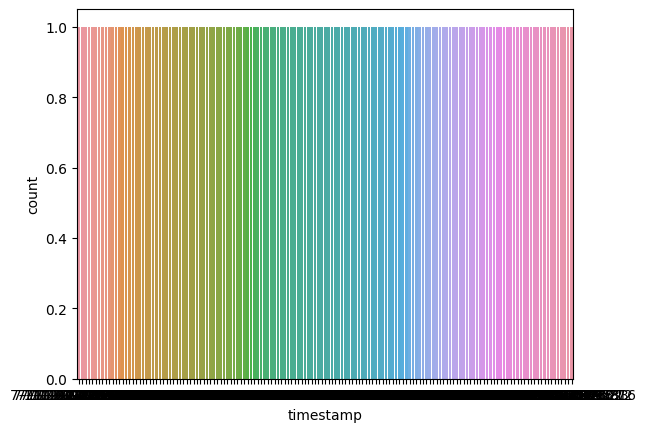

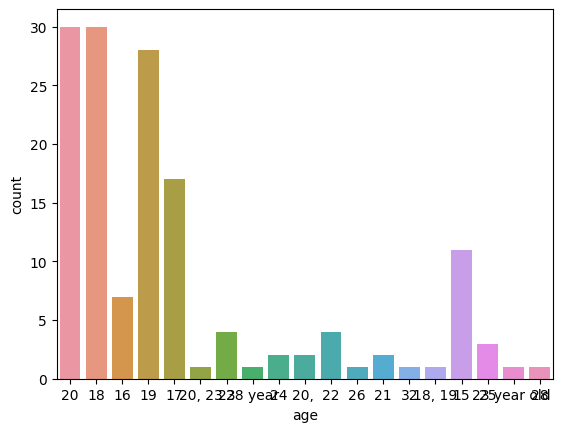

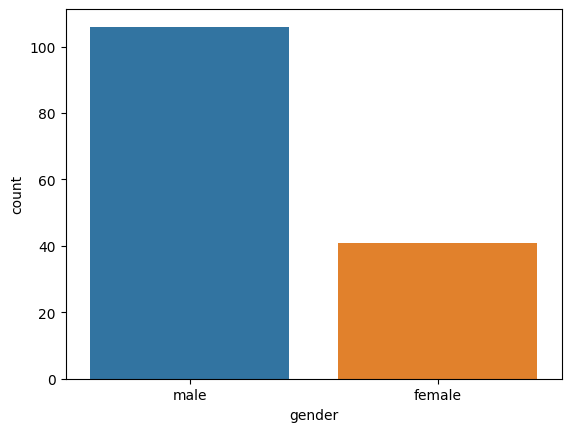

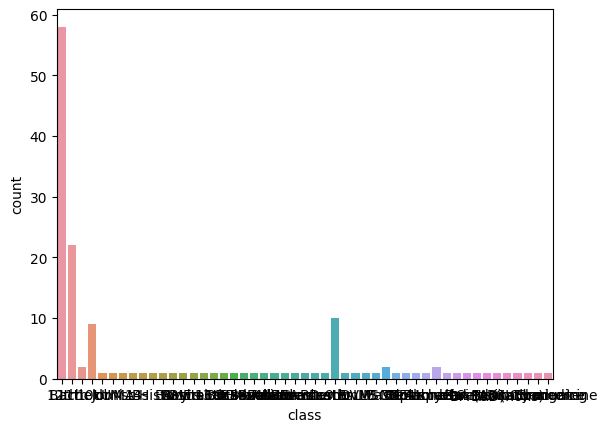

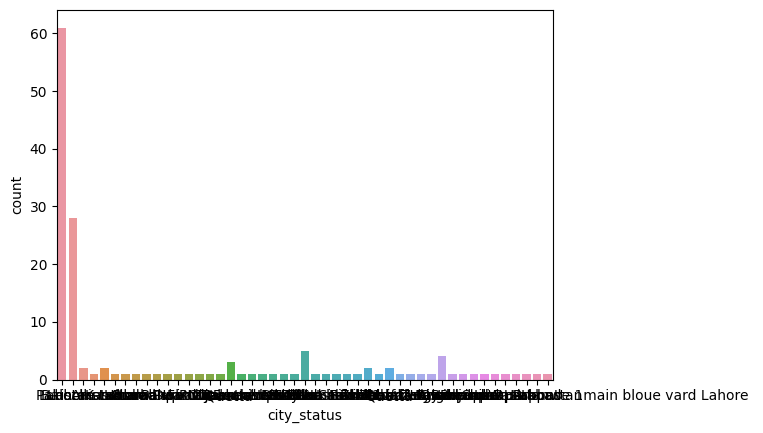

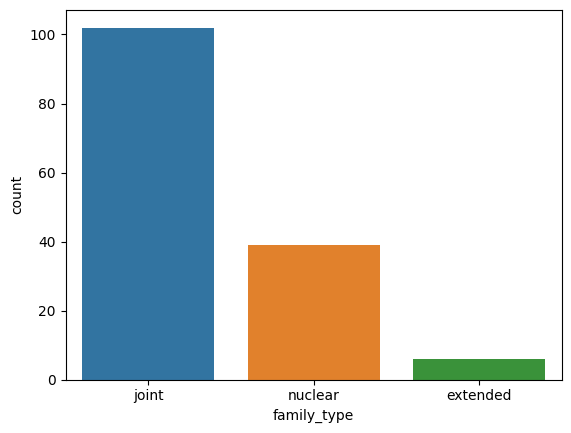

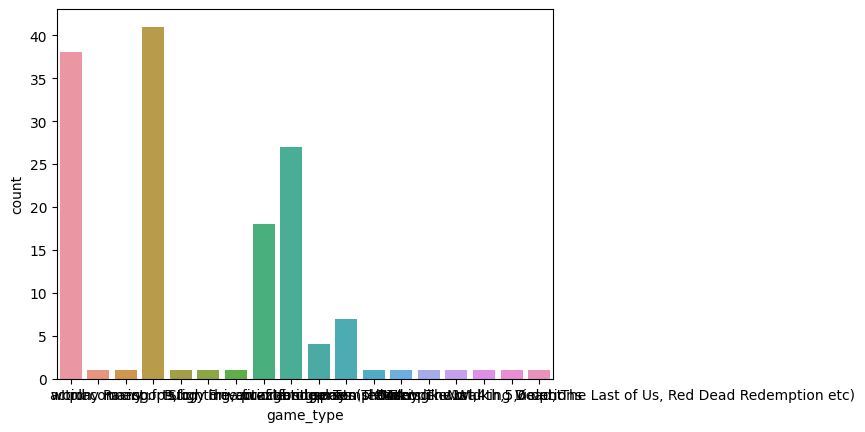

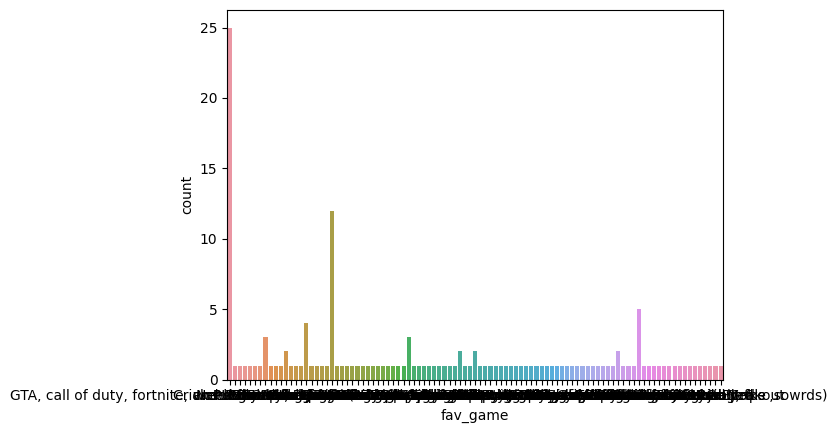

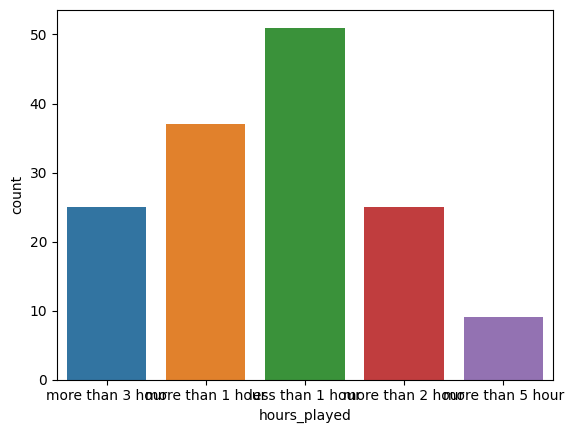

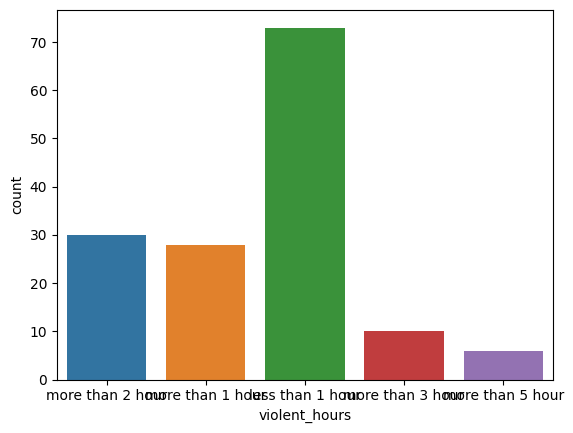

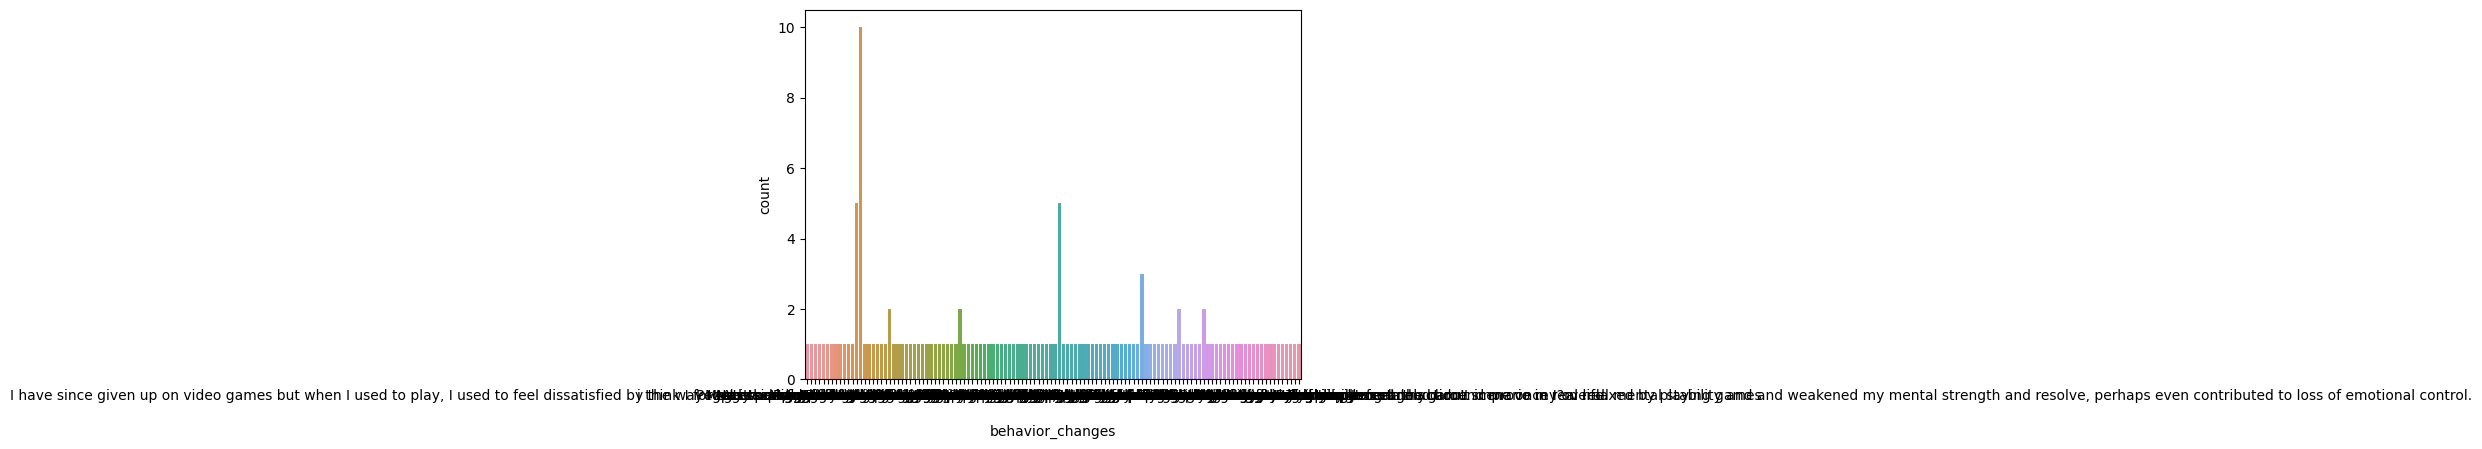

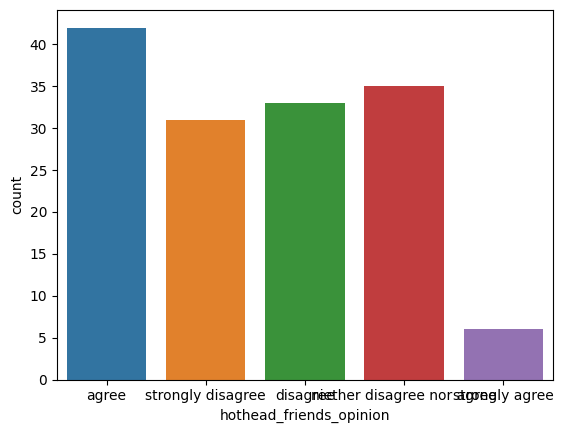

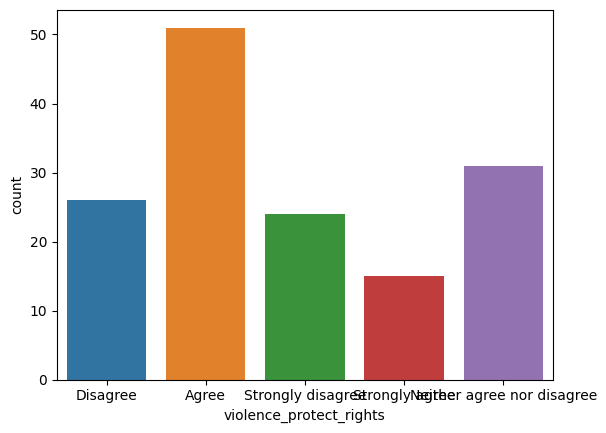

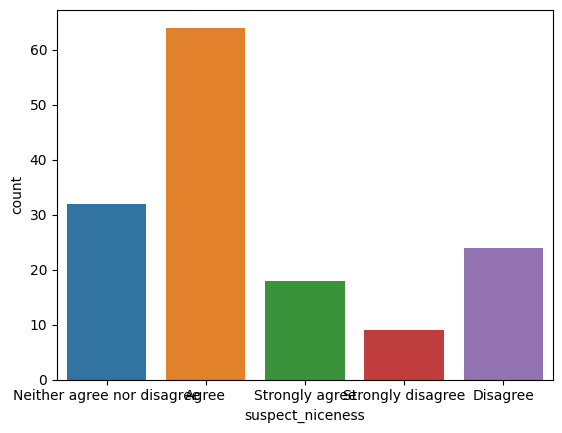

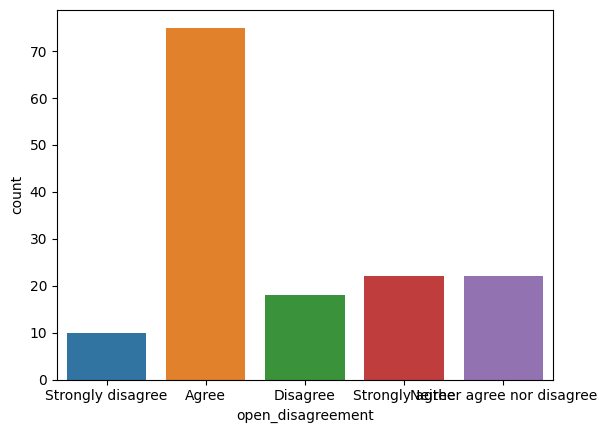

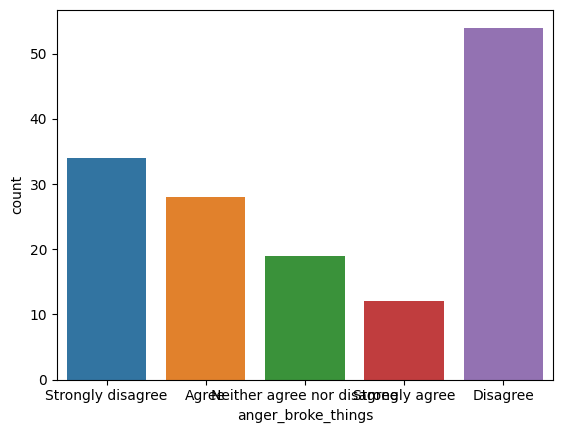

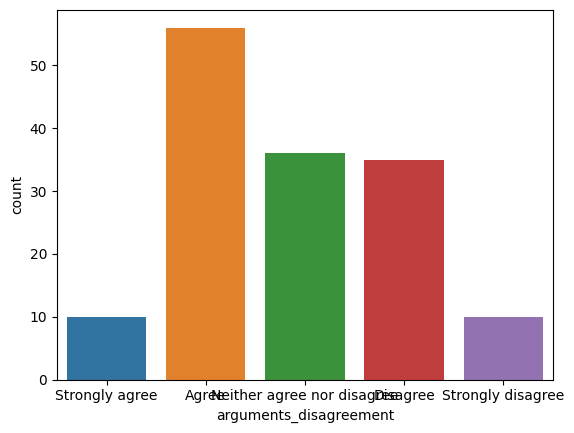

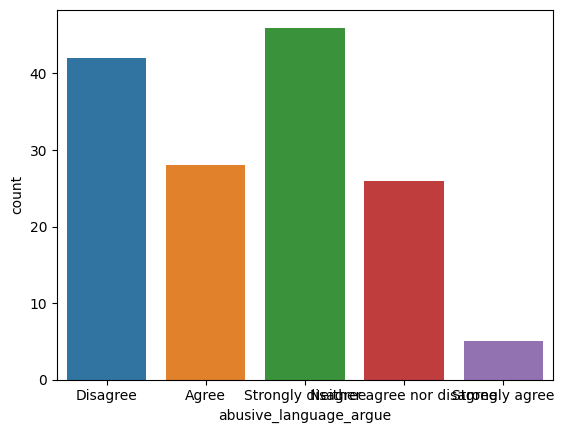

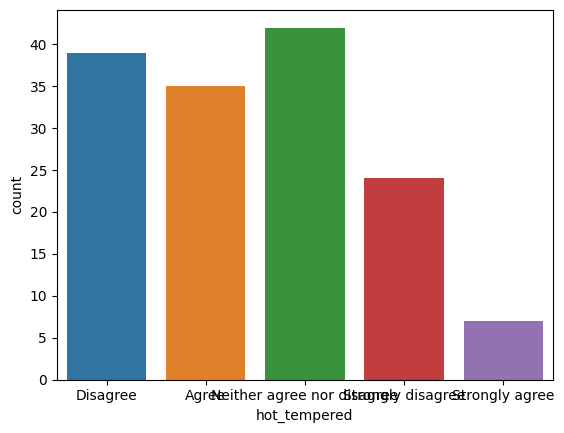

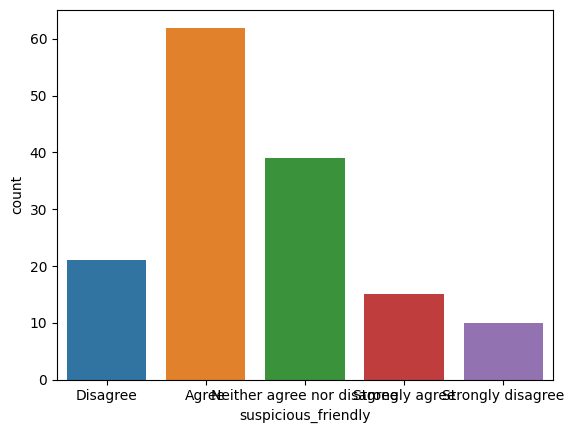

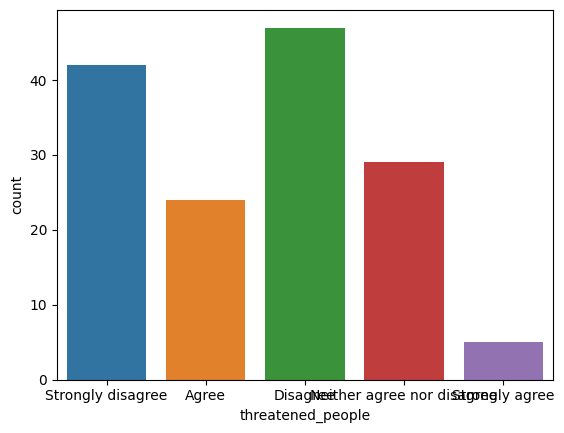

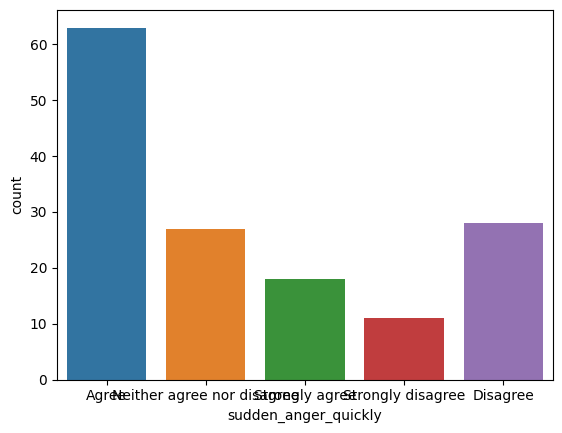

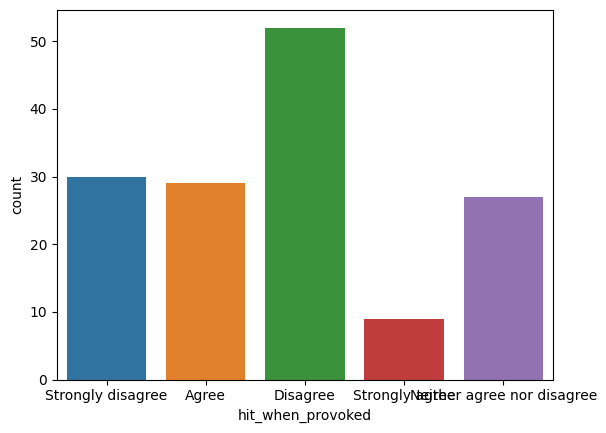

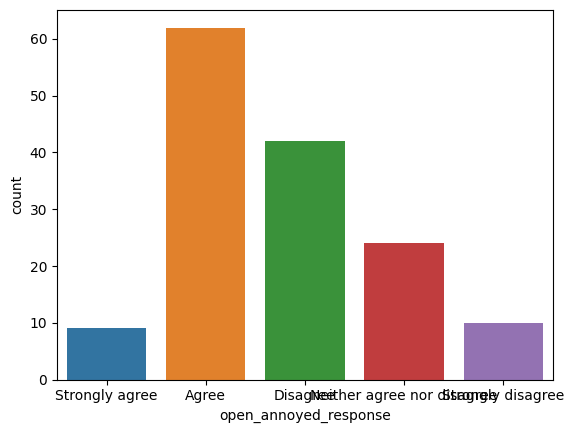

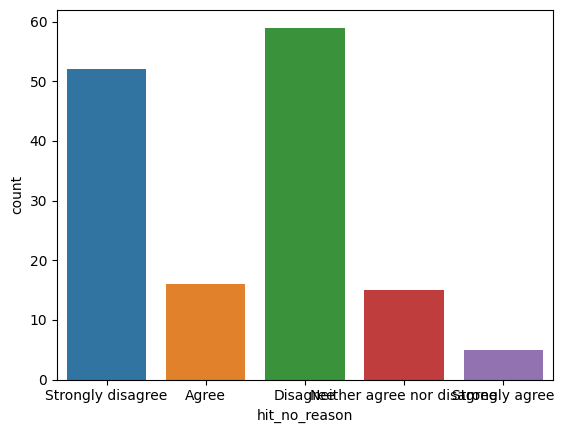

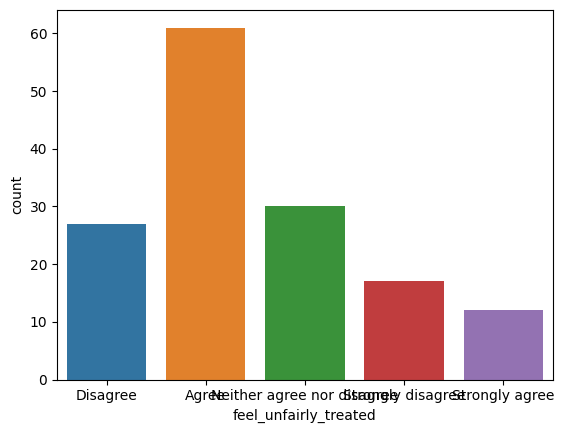

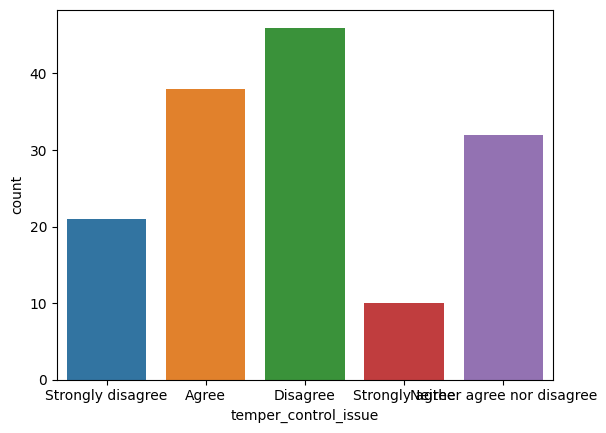

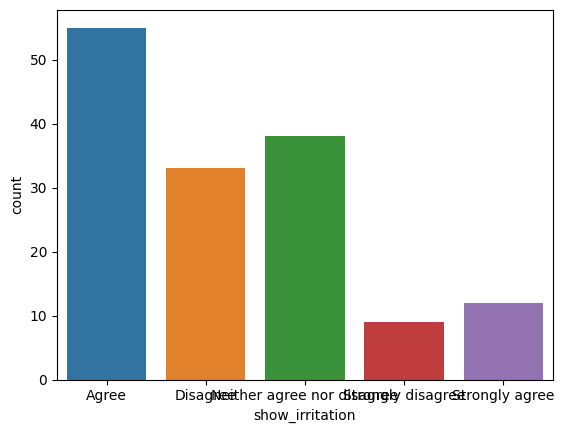

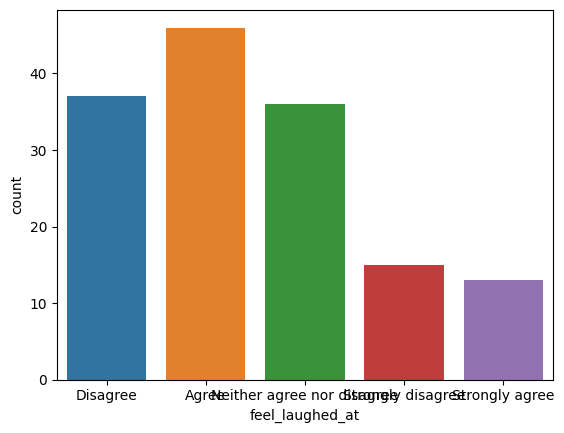

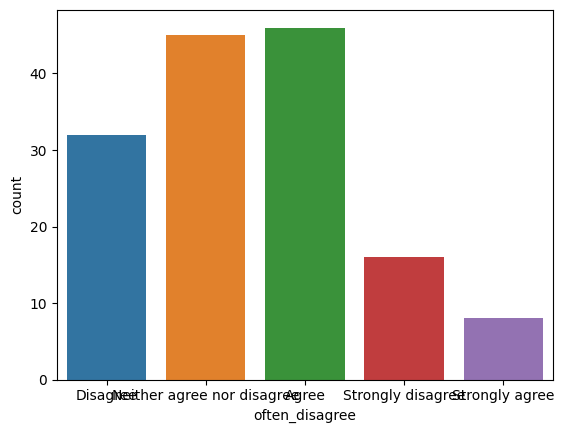

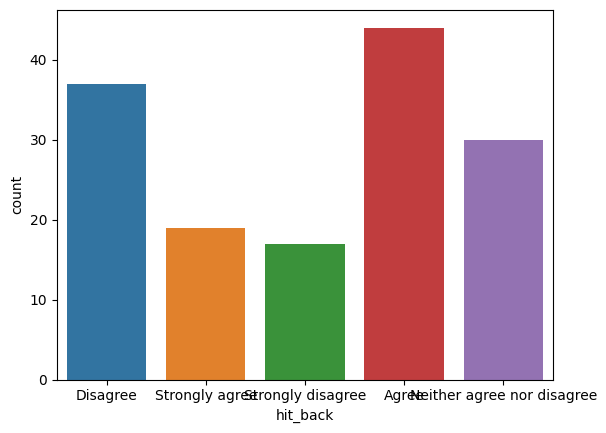

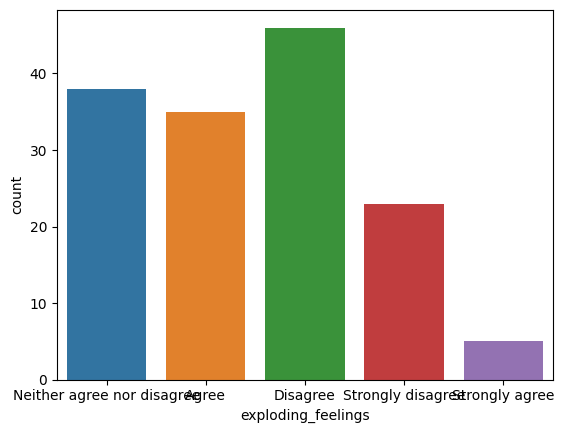

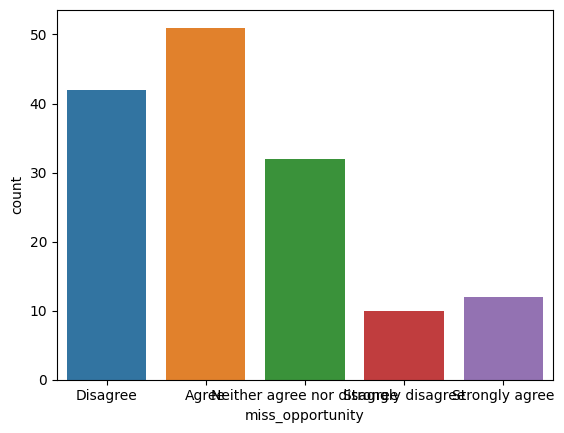

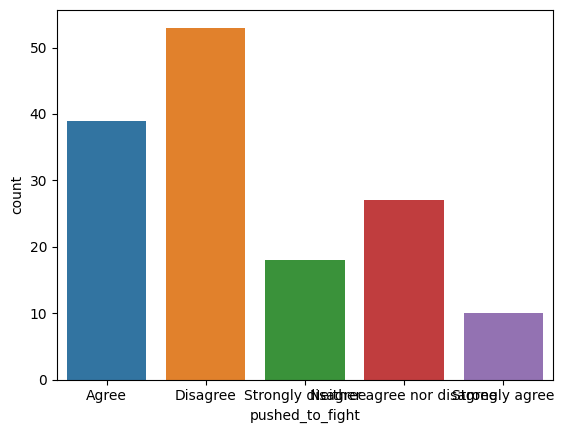

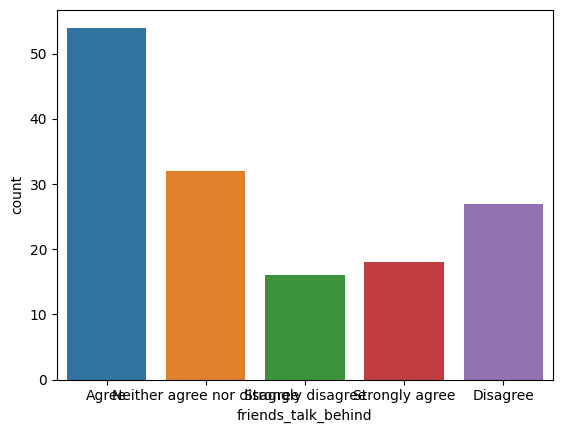

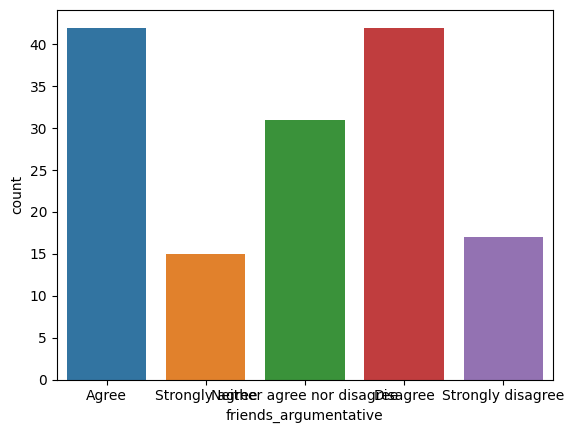

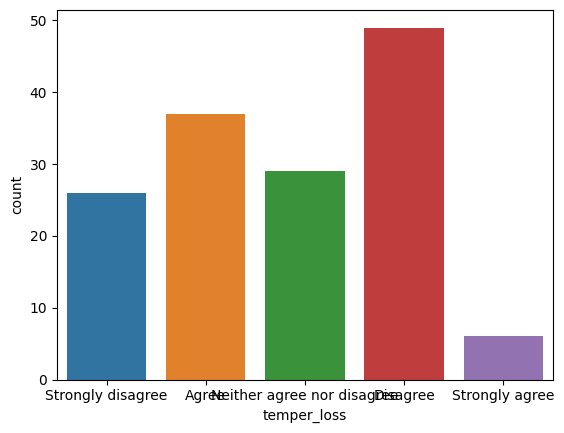

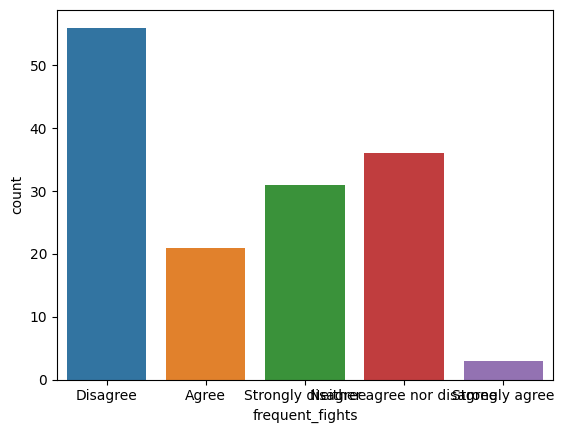

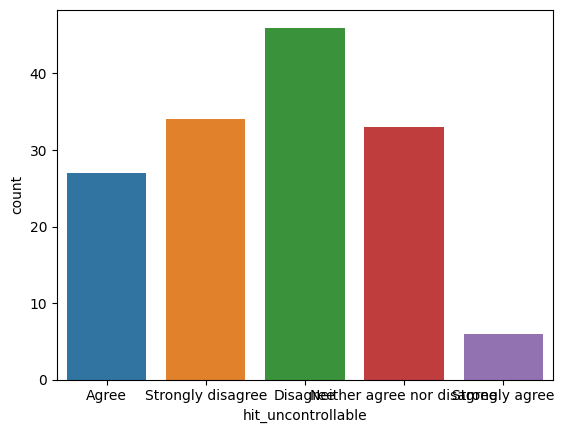

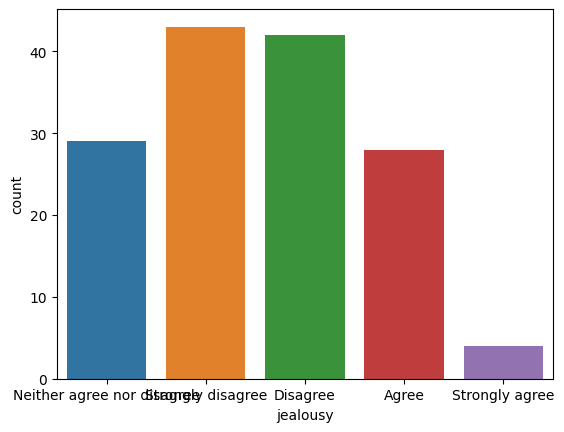

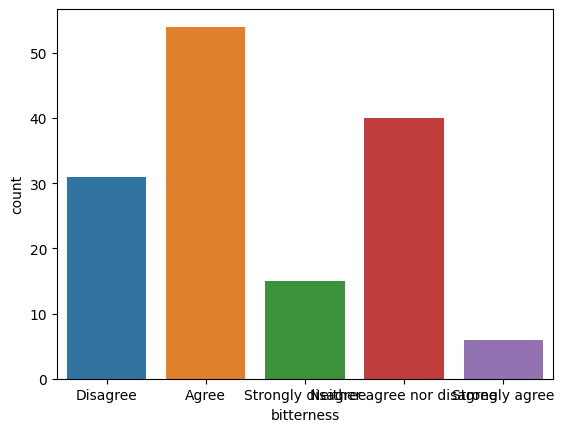

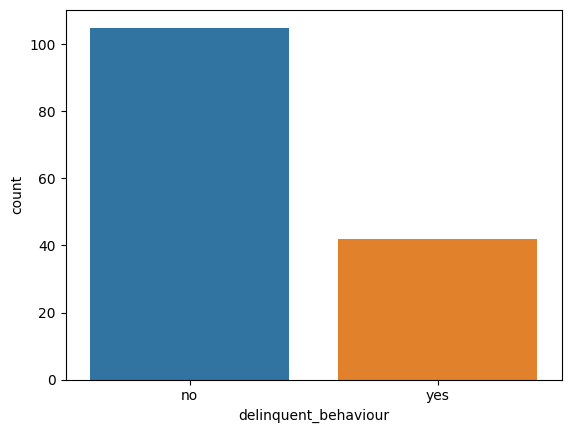

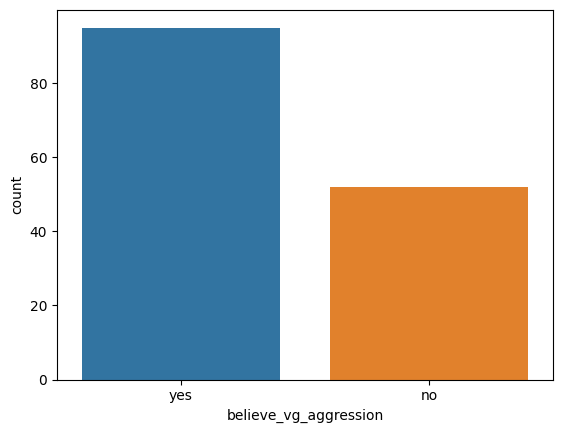

In [8]:
import seaborn as sns
for c in data.columns:
    sns.countplot(data=data, x=c)
    plt.show()